In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
import cvxpy as cp

### Graph Coloring Problem 

#### Key words:

Vertex Coloring: Assigning colors to the vertices of a graph such that no two vertices sharing the same edge have the same color. 

K-coloring: using at most k colors to assign colors to the vertices of a graph

Chromatic coloring: the minimum number of colors necessary for vertex coloring of graph

#### Polynomial time:

- We can easily decide if a graph can be assigned to 2 colors by checking if the graph can be divided into two sets (bipartite graph). 
- This is computable in linear time

However, the running time is $\mathcal{O} (2^n)$ if a graph have n vertices with k colors. In the set partitioning problem, we are finding the total ways that the elements can be divided into subsets. For each element, we decide whether to include it or not, so the worst case is $2^n$ possible combinations. From the different ways of dividing the sets, there might be a set with a number of subset equal to k. 

- this is almost the brute force method because we are finding the number of sets that can be formed by the graph and then assigning the color.

#### Greedy coloring:

- Similar to greedy algorithm, it considers the graph in an order and assigns each vertex the first color that satisfies the constraints. 
- This can be found in linear time, but it might not use the minimum number of colors possible because it depends on the order of the graph

### Changing the graph coloring problem into scheduling problem

It seems that the graph coloring problem is more suitable for the assigning problem because we are assigning k colors to n number of vertices. However, we can turn this into a scheduling problem if we consider the graph in a certain order, treat the vertices like flight legs and the routes as colors. The edges will be treated as a constraint to check if two pairs of vertices have the same color. 

Since the amount of neighbors determine the minimum number of colors, then we can sort the graph in order of the most neighbors to the least neighbors when implementing the greedy algorithm.

#### 1. State the problem

Suppose there is a graph G has vertex $V_i$. We have k colors denoted by $C_k$. Considering that the vertices have an order starting from the most neighbour to the least neighbour, find the least number of k colors such that the edges connected to vertex i and vertex j are not the same color. 

#### 2. Define the parameters and variables

**Parameters:**
* n = number of vertices
* k = number of colors
* $v_{i}$ = vertex i
* $c_{k}$ = 1 if color k is used and 0 otherwise
* E = set that keeps the pair of vertices (i, j)

**Decision Variables:**
* Let $v_{i,k}$ = 1 if vertex i is assigned to a color k, and 0 otherwise

**Objective:**
Minimize the total number of colors assigned to the vertices
$$\text{min} \quad c_k$$

#### 3. State the assumptions and constraints

**Assumptions**
- If a vertex is connected to a maximum of n number of edges, then the minimum color available should be n+1

**Constraints**

* Each vertex should only be assigned to one color
$$\sum_{i=1}^n v_{i,k} = 1, $$
* Adjacent vertices should have different color k
$$v_{i, k} + v_{j, k} \leq c_k, \text{ for all (i, j)$\in$E}$$ 

#### 4. Build the solutions

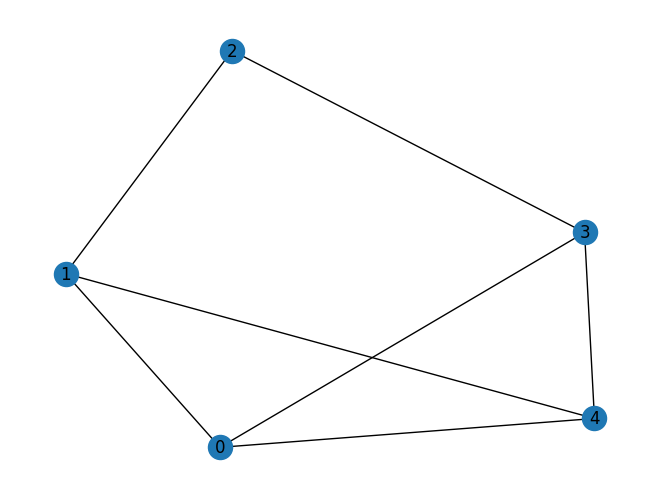

In [48]:
# Define the graph and let there be 4 vertices
nodes = [i for i in range(5)] # create int array from  0-4
Edges = [(0, 1), (0, 3), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4)]
# create a graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(Edges)
nx.draw(G, with_labels=True)
plt.show()

In [51]:
n = len(nodes)# number of verices
# the maximum number of colors is the maximum number of vertices
k = len(nodes)

# Create decision variables
x = cp.Variable((n, k), integer = True)
c = cp.Variable(k, integer = True)

constraints = []

# Each node should be assign a color
for i in range(n):
    constraints.append(cp.sum(x[i, :]) == 1)

# adjacent vertices should have different color
for i, j in Edges:
    for a in range(k):
        constraints.append(x[i, a] + x[j, a] <= c[a])

objective = cp.Minimize(cp.sum(c))
problem = cp.Problem(objective, constraints)
problem.solve()
print("Optimal value:", objective.value) # color index starts from 0

Optimal value: 2.0


#### 5. Evaluation

Apply to exam scheduling problem

A set of students need to be assigned into multiple exams. A student cannot take two exams at the same time. Each exams can be scheduled anytime. We can design the edges of the graph as a pair of exams that needs to be taken by the same student. The exam needs to be scheduled at different times. We can use graph coloring to avoid a situation. So, the exams are the nodes and the timeslots for the exam are the colors. Then, we can find the minimum number of timeslots needed to schedule all exams. 

Reference:
- "Graph coloring." Wikipedia, The Free Encyclopedia. Wikimedia Foundation, 10 Mar. 2022.